<center>
    
<h2>Đồ Án KHMT</h2>
    
</center>
 
---
**Thông tin sinh viên:**
1. Mã Sinh viên: 2121050118
2. Họ tên SV: Nguyễn Văn Dũng
3. Ngày sinh: 14/09/2003
3. Lớp: DCCTCT66_07E
4. Nhóm môn học: 04
5. Mã nhóm: 7080506
6. GV hướng dẫn: Nguyễn Thị Hải Yến

In [1]:
#gọi các thư viện:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#------------------------------
import warnings
warnings.filterwarnings('ignore')

###  Đọc tập dữ liệu
---

1) age - Tuổi của khách hàng.
2) job - Nghề nghiệp của khách hàng.
3) marital - Tình trạng hôn nhân. 
4) education - Trình độ học vấn.
5) default - Khách hàng có nợ xấu hay không? (yes/no).
6) balance - Số dư tài khoản ngân hàng.
7) housing - Khách hàng có khoản vay thế chấp nhà không?
8) loan - Khách hàng có khoản vay cá nhân không? (yes/no).
9) contact - Phương thức liên hệ với khách hàng (yes/no).
10) day - Ngày trong tháng mà khách hàng được liên hệ lần gần nhất.
11) month - Tháng mà khách hàng được liên hệ lần gần nhất.
12) duration - Thời gian của cuộc gọi cuối cùng (tính bằng giây).
13) campaign - Số lần liên hệ trong chiến dịch hiện tại.
14) pdays - Số ngày kể từ lần liên hệ trước đó.
15) previous - Số lần liên hệ trước đó trong chiến dịch trước.
16) poutcome - Kết quả của chiến dịch tiếp thị trước đó (success = thành công, failure = thất bại, unknown = không xác định).
17) Target - Mục tiêu (Khách hàng có đăng ký gửi tiền có kỳ hạn của ngân hàng không?) (yes/no).

In [3]:
#Đọc tập dữ liệu:
data_bank_full = pd.read_csv('Data/bank-full.csv')
data_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#Hiển thị 5 bản ghi đầu tiên:
data_bank_full.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#Hiển thị 5 bản ghi cuối cùng:
data_bank_full.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
#Hiển thị 5 bản ghi ngẫu nhiên:
data_bank_full.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
19118,38,admin.,married,tertiary,no,1980,no,no,cellular,5,aug,176,2,-1,0,unknown,no
42316,49,technician,divorced,secondary,no,972,no,no,cellular,16,nov,104,3,175,2,failure,no
906,27,services,single,secondary,no,0,yes,no,unknown,7,may,388,7,-1,0,unknown,no
15163,32,services,married,secondary,no,1844,yes,yes,cellular,17,jul,168,6,-1,0,unknown,no
26061,42,blue-collar,married,primary,no,792,yes,yes,cellular,19,nov,611,2,175,12,other,no


###  Quan sát dữ liệu
---

In [8]:
#1. Quan sát Các thuộc tính số
data_bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Nhận xét
------

1) Thuộc tính balance có giá trị min = -8019 --> bất thường - dữ liệu ngoại lai (nhưng lại cần thiết trong phân tích nên đưa về nhóm tài khoản của khách hàng đang nợ ngân hàng)
2) Thuộc tính pdays có giá trị max = 871 --> bất thường - dữ liệu ngoại lai
3) Thuộc tính pdays có giá trị -1 --> bất thường - dữ liệu ngoại lai
4) Thuộc tính previous có giá trị max = 275 --> bất thường - dữ liệu ngoại lai

In [10]:
#Dữ liệu catagorical (định tính)
data_bank_full.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [11]:
#Liệt kê các giá trị của thuộc tính
print('1. Thuộc tính job:',data_bank_full['job'].unique())
print('2. Thuộc tính marital:',data_bank_full['marital'].unique())
print('3. Thuộc tính education:',data_bank_full['education'].unique())
print('4. Thuộc tính default:',data_bank_full['default'].unique())
print('5. Thuộc tính housing:',data_bank_full['housing'].unique())
print('6. Thuộc tính loan:',data_bank_full['loan'].unique())
print('7. Thuộc tính month:',data_bank_full['month'].unique())
print('8. Thuộc tính poutcome:',data_bank_full['poutcome'].unique())
print('9. Thuộc tính Target:',data_bank_full['Target'].unique())
print('10. Thuộc tính contact:',data_bank_full['contact'].unique())

1. Thuộc tính job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
2. Thuộc tính marital: ['married' 'single' 'divorced']
3. Thuộc tính education: ['tertiary' 'secondary' 'unknown' 'primary']
4. Thuộc tính default: ['no' 'yes']
5. Thuộc tính housing: ['yes' 'no']
6. Thuộc tính loan: ['no' 'yes']
7. Thuộc tính month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
8. Thuộc tính poutcome: ['unknown' 'failure' 'other' 'success']
9. Thuộc tính Target: ['no' 'yes']
10. Thuộc tính contact: ['unknown' 'cellular' 'telephone']


## Tiền xử lý dữ liệu

### Kiểm tra trùng lặp

In [14]:
#Thống kê xem có bản ghi trùng lặp nào trong dữ liệu hay không?:
data_bank_full.duplicated().sum()

0

### Kiểm tra dữ liệu thiếu trong Dataset

In [16]:
#Kiểm tra dữ liệu thiếu trong Dataset
data_bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### Kiểm tra dữ liệu ngoại lai

In [18]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
def calculate_outlier_percentage(column):
    Q1 = data_bank_full[column].quantile(0.25)
    Q3 = data_bank_full[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_bank_full[(data_bank_full[column] < lower_bound) | (data_bank_full[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(data_bank_full)) * 100

    return outlier_percentage

for i in num_cols:
    outlier_percentage = calculate_outlier_percentage(i)
    print(f"Cột: {i},    Dữ liệu ngoại lai: {outlier_percentage:.2f}%")

Cột: age,    Dữ liệu ngoại lai: 1.08%
Cột: balance,    Dữ liệu ngoại lai: 10.46%
Cột: day,    Dữ liệu ngoại lai: 0.00%
Cột: duration,    Dữ liệu ngoại lai: 7.16%
Cột: campaign,    Dữ liệu ngoại lai: 6.78%
Cột: pdays,    Dữ liệu ngoại lai: 18.26%
Cột: previous,    Dữ liệu ngoại lai: 18.26%


In [20]:
data_bank_full.Target.value_counts()

Target
no     39922
yes     5289
Name: count, dtype: int64

In [21]:
data_bank_full.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [22]:
data_bank_full.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [23]:
data_bank_full.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [24]:
data_bank_full.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [25]:
data_bank_full.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [26]:
data_bank_full.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [27]:
data_bank_full.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [28]:
data_bank_full.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

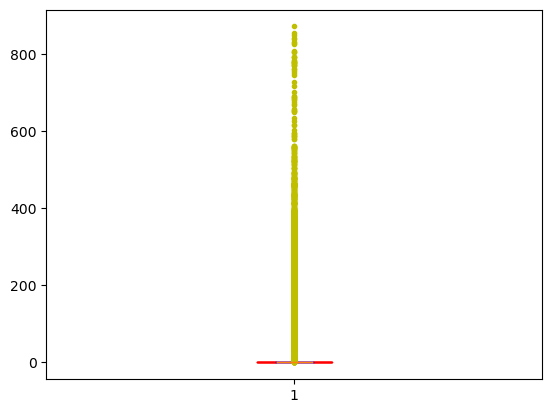

In [29]:
plt.boxplot(data_bank_full['pdays'], notch = True, sym = "y.", boxprops = {"color" : 'r'}, capprops = {"color" : "b"}, whiskerprops = {"color" : "g"})
plt.show()

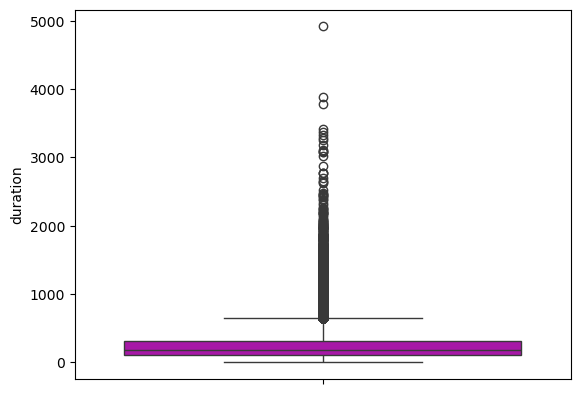

In [30]:
sns.boxplot(data_bank_full['duration'], color = 'm')
plt.show()

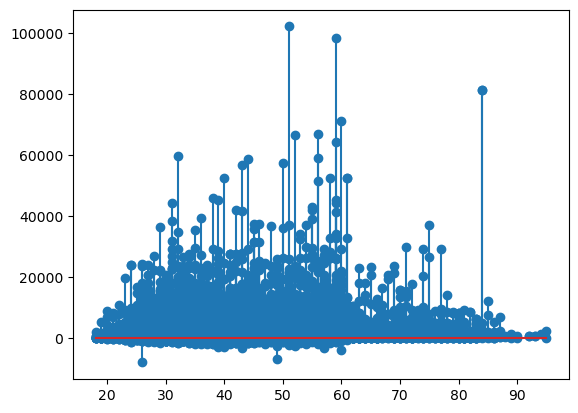

In [31]:
x = data_bank_full['age']
y = data_bank_full['balance']
plt.stem(x, y)
plt.show()

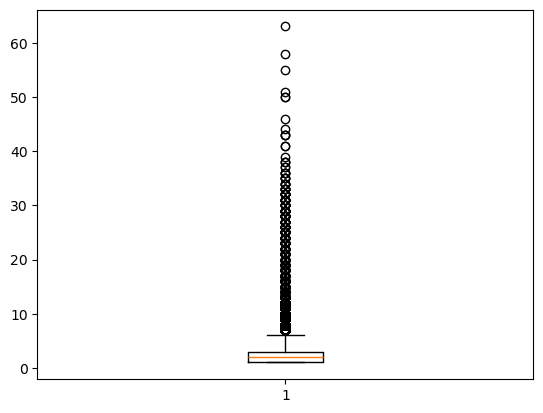

In [32]:
plt.boxplot(data_bank_full.campaign)
plt.show()

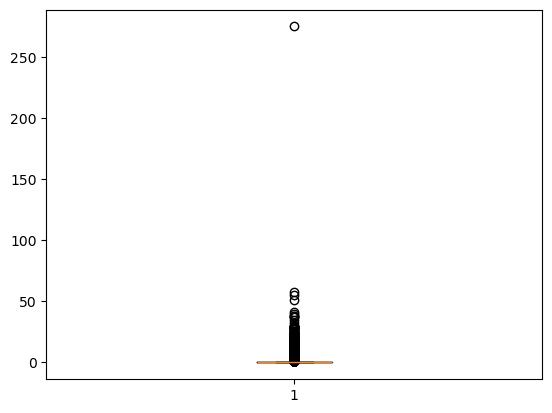

In [33]:
plt.boxplot(data_bank_full.previous)
plt.show()

In [34]:
data_bank_full[data_bank_full.duration >= 3750]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
9947,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no
44602,45,services,single,secondary,no,955,no,no,unknown,27,aug,3785,1,-1,0,unknown,no


In [35]:
data_bank_full.drop([24148, 9947, 44602], axis = 0, inplace = True)

In [36]:
data_bank_full[data_bank_full.campaign >= 50]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,88,51,-1,0,unknown,no
4330,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
5459,35,blue-collar,married,secondary,no,430,yes,no,unknown,23,may,147,50,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1,0,unknown,no
18713,35,blue-collar,married,secondary,no,280,yes,yes,cellular,31,jul,65,50,-1,0,unknown,no


In [37]:
data_bank_full.drop([4299, 4330, 5073, 5459, 11914, 18713], axis = 0, inplace = True)

#### --> day và month không cần thiết, vì chúng ta không thực hiện phân tích chuỗi thời gian nào.
#### --> pdays và previous cũng bị loại bỏ vì giá trị tối thiểu của chúng xuất hiện hơn 80% số lần và IQR = 0 cho cả hai.
#### --> poutcome bị loại bỏ vì hầu hết các mục nhập là "unknown" (không xác định), nên nó không thực sự hữu ích.

In [39]:
data_bank_full.drop(['pdays', 'previous', 'day', 'month', 'poutcome'], axis = 1, inplace = True)
data_bank_full

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,no


In [40]:
# cập nhật num_cols vì một số cột đã bị xóa
num_cols = ['age', 'balance', 'duration', 'campaign']

### Trực quan hóa dữ liệu

In [42]:
#Thống kê số lượng theo từng công việc:
job = data_bank_full['job'].value_counts()
job

job
blue-collar      9730
management       9455
technician       7594
admin.           5171
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [43]:
#xây dựng một số hàm vẽ biểu đồ:
#Hàm hiển thị text trên biểu đồ cột:
def label_bar(bar_plot,bar_label):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

#Hàm vẽ biểu đồ hình cột:
def plot_bar(r,h,p,x,y,c,t=0):
    plt.subplot(r,h,p)
    ax1 = plt.bar(x,y,color=c)
    label_bar(ax1,y)
    plt.xticks(x,
           rotation=t)
    plt.grid(ls='--')
    
#Hàm vẽ biểu đồ hình tròn:
def plot_pie(r,h,p,label,value,c):
    plt.subplot(r,h,p)
    plt.pie(value,
            labels=label,
            colors=c,
            startangle=90,
            labeldistance=1.1,
            pctdistance=0.6, 
            wedgeprops=dict(width=0.7,edgecolor='w'),
            autopct='%.2f %%')

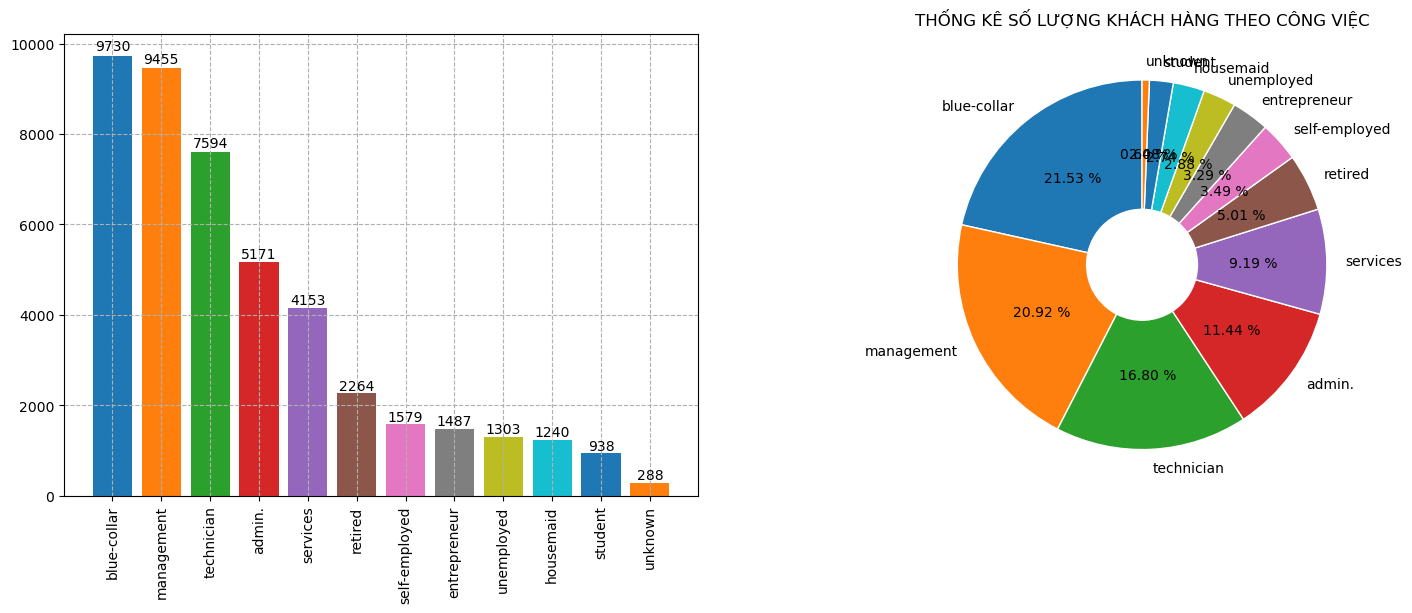

In [44]:
color1=sns.color_palette()
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu giới tính:
plot_bar(1,2,1,job.index,job.values,color1,90)
plot_pie(1,2,2,job.index,job.values,color1)
plt.title('THỐNG KÊ SỐ LƯỢNG KHÁCH HÀNG THEO CÔNG VIỆC')
plt.show()

In [45]:
#Thống kê số lượng theo từng trạng thái:
marital = data_bank_full['marital'].value_counts()
marital

marital
married     27208
single      12787
divorced     5207
Name: count, dtype: int64

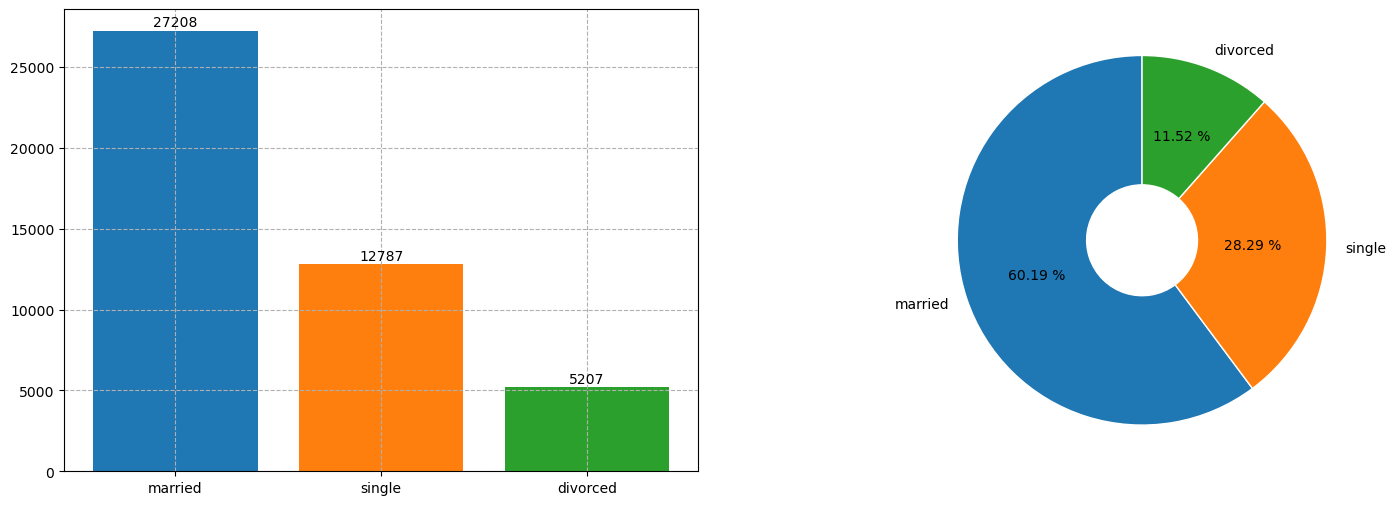

In [46]:
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu tình trạng trong các mối quan hệ:
plot_bar(1,2,1,marital.index,marital.values,color1)
plot_pie(1,2,2,marital.index,marital.values,color1)

In [47]:
#Thống kê số lượng theo từng trạng thái:
education = data_bank_full['education'].value_counts()
education

education
secondary    23197
tertiary     13299
primary       6850
unknown       1856
Name: count, dtype: int64

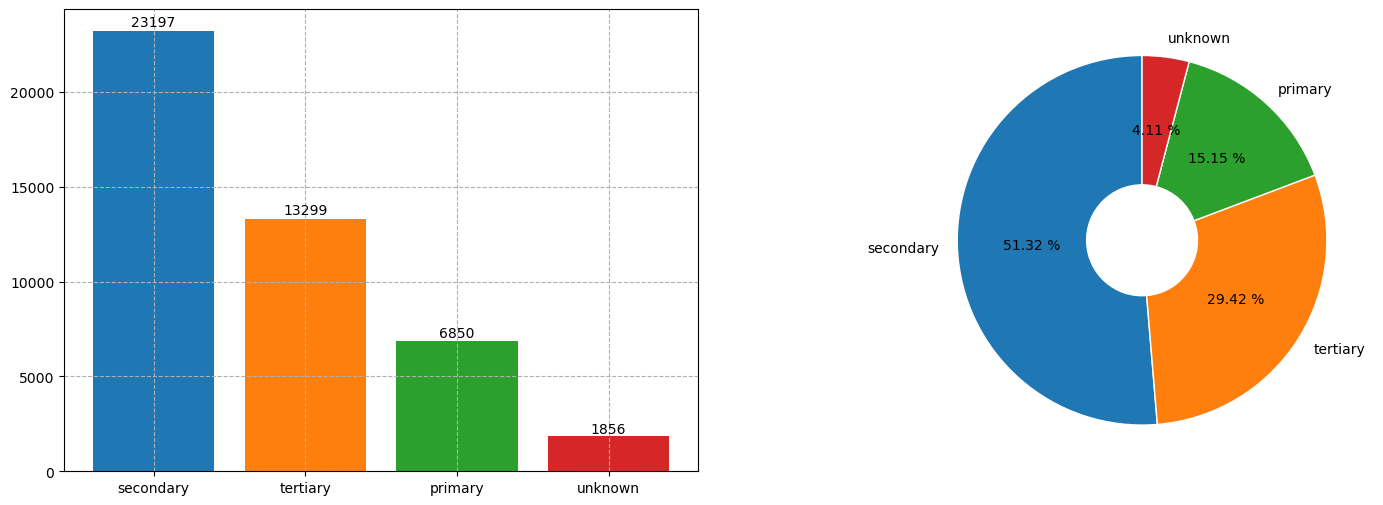

In [48]:
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu tình trạng trong các mối quan hệ:
plot_bar(1,2,1,education.index,education.values,color1)
plot_pie(1,2,2,education.index,education.values,color1)

In [49]:
#Thống kê số lượng theo từng trạng thái:
default = data_bank_full['default'].value_counts()
default

default
no     44387
yes      815
Name: count, dtype: int64

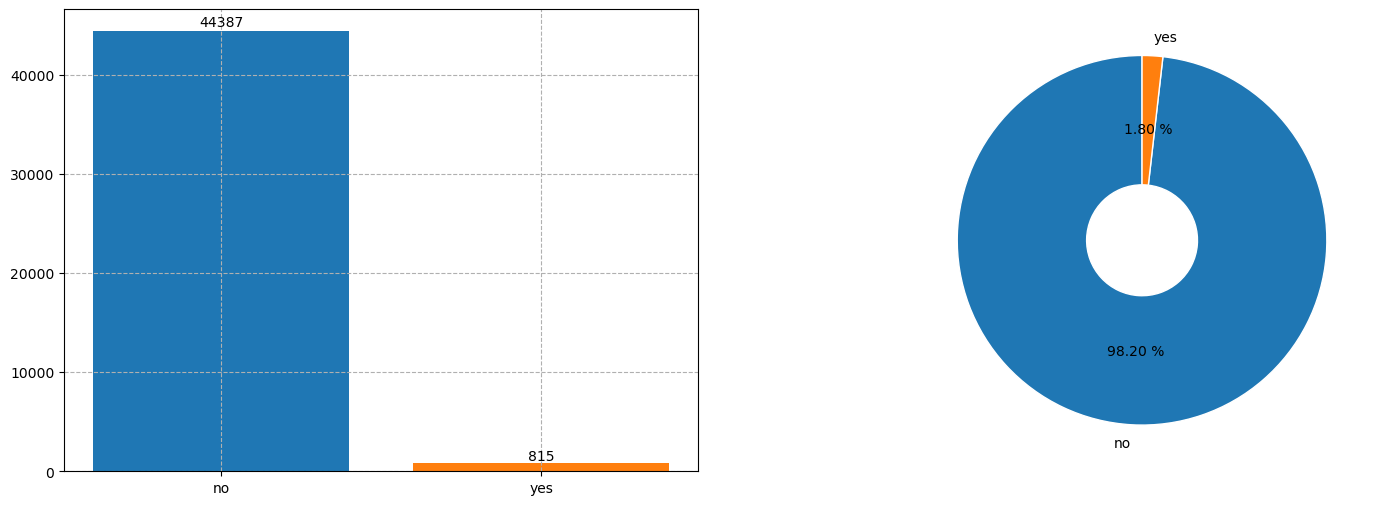

In [51]:
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu tình trạng trong các mối quan hệ:
plot_bar(1,2,1,default.index,default.values,color1)
plot_pie(1,2,2,default.index,default.values,color1)

In [52]:
#Thống kê số lượng theo từng trạng thái:
housing = data_bank_full['housing'].value_counts()
housing

housing
yes    25123
no     20079
Name: count, dtype: int64

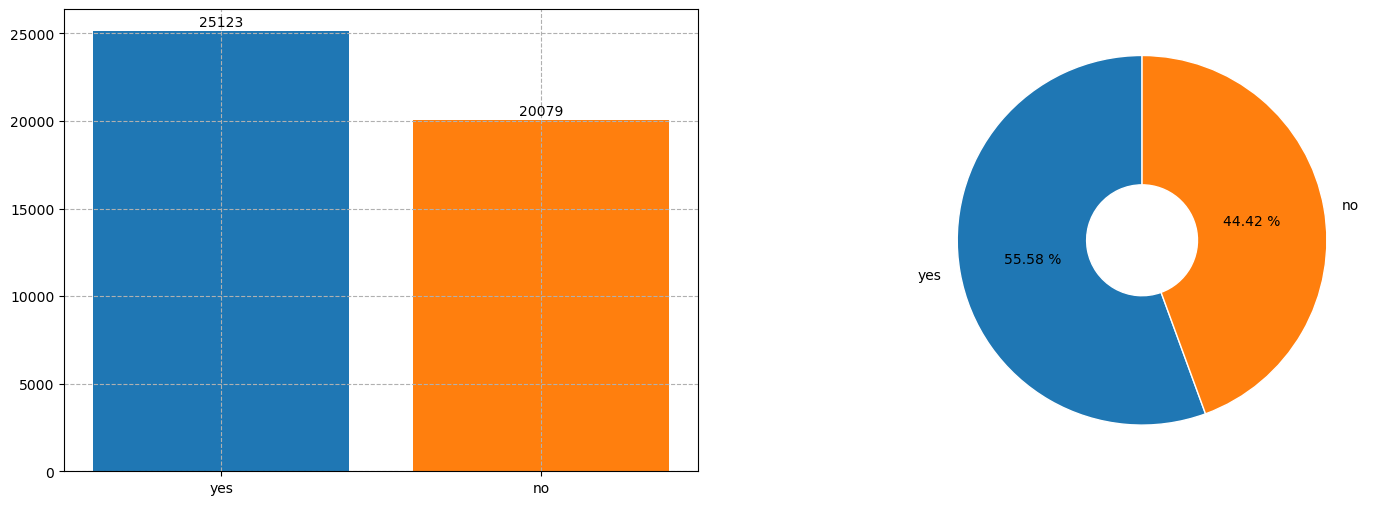

In [53]:
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu sở hữu nhà:
plot_bar(1,2,1,housing.index,housing.values,color1)
plot_pie(1,2,2,housing.index,housing.values,color1)

In [54]:
#Thống kê số lượng theo từng trạng thái:
loan = data_bank_full['loan'].value_counts()
loan

loan
no     37959
yes     7243
Name: count, dtype: int64

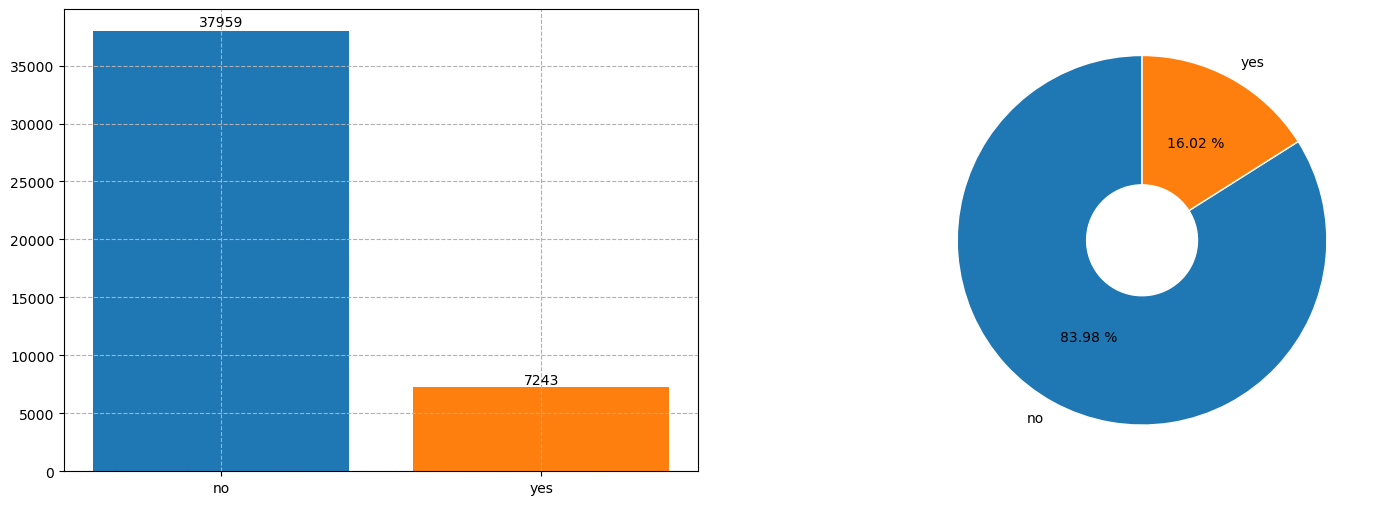

In [57]:
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu sở hữu nhà:
plot_bar(1,2,1,loan.index,loan.values,color1)
plot_pie(1,2,2,loan.index,loan.values,color1)

In [60]:
#Thống kê số lượng theo từng trạng thái:
contact = data_bank_full['contact'].value_counts()
contact

contact
cellular     29284
unknown      13013
telephone     2905
Name: count, dtype: int64

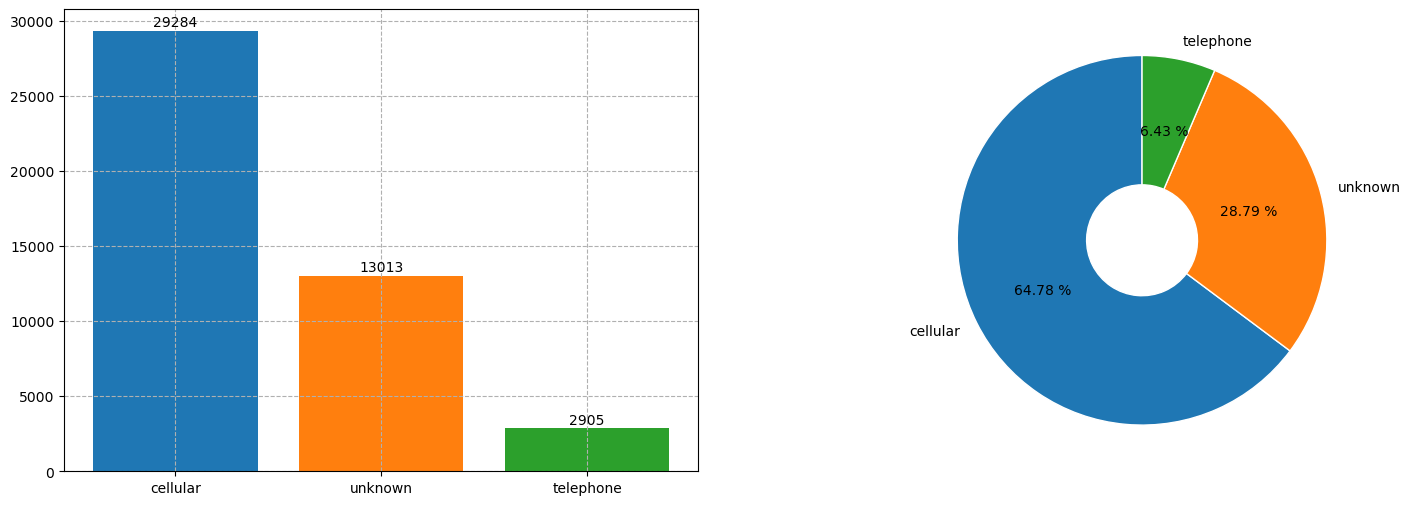

In [61]:
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu sở hữu nhà:
plot_bar(1,2,1,contact.index,contact.values,color1)
plot_pie(1,2,2,contact.index,contact.values,color1)

In [63]:
#Thống kê số lượng theo từng trạng thái:
Target = data_bank_full['Target'].value_counts()
Target

Target
no     39914
yes     5288
Name: count, dtype: int64

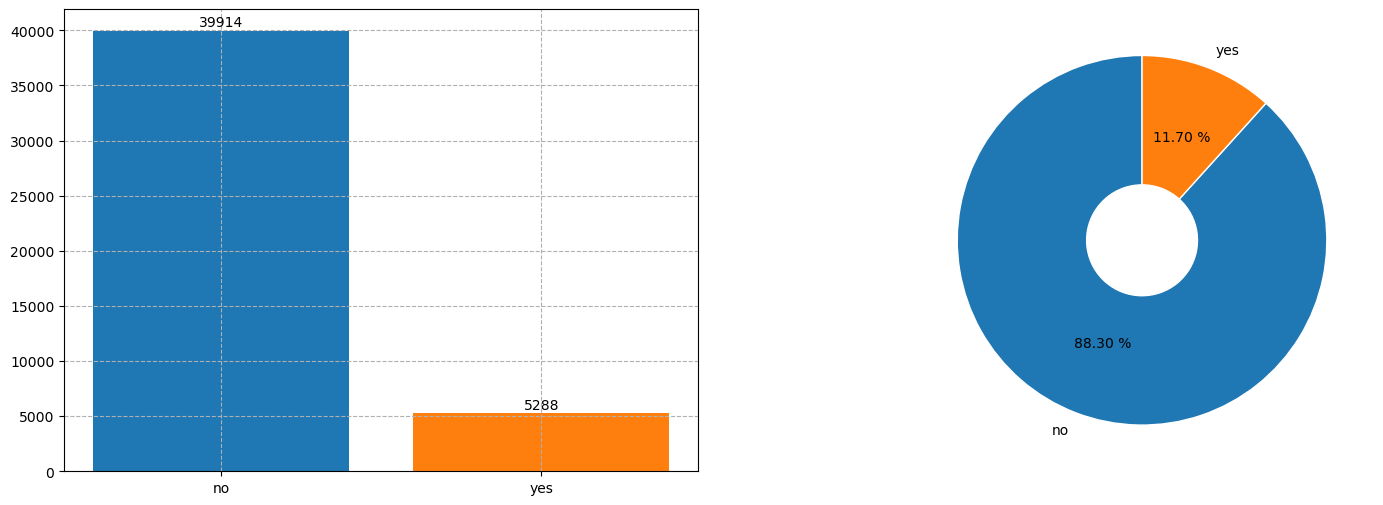

In [65]:
plt.figure(figsize=(18,6))
#Trực quan hóa số liệu sở hữu nhà:
plot_bar(1,2,1,Target.index,Target.values,color1)
plot_pie(1,2,2,Target.index,Target.values,color1)

-> Tập dữ liệu mất cân bằng trung bình (Moderate)

## Rời rạc hóa dữ liệu

In [72]:
data_bank_full.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,Target
31077,71,retired,married,primary,no,4657,no,no,cellular,93,5,yes
30003,39,unemployed,married,secondary,no,1309,yes,no,cellular,587,2,no
20908,50,services,married,primary,no,12,yes,no,cellular,168,1,no
2160,46,blue-collar,married,primary,no,-29,yes,no,unknown,322,1,no
216,47,unknown,married,unknown,no,28,no,no,unknown,338,2,no


In [79]:
#Liệt kê các giá trị của thuộc tính
print('1. Thuộc tính job:',data_bank_full['job'].unique())
print('2. Thuộc tính marital:',data_bank_full['marital'].unique())
print('3. Thuộc tính education:',data_bank_full['education'].unique())
print('4. Thuộc tính default:',data_bank_full['default'].unique())
print('5. Thuộc tính housing:',data_bank_full['housing'].unique())
print('6. Thuộc tính loan:',data_bank_full['loan'].unique())
print('7. Thuộc tính Target:',data_bank_full['Target'].unique())
print('8. Thuộc tính contact:',data_bank_full['contact'].unique())

1. Thuộc tính job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
2. Thuộc tính marital: ['married' 'single' 'divorced']
3. Thuộc tính education: ['tertiary' 'secondary' 'unknown' 'primary']
4. Thuộc tính default: ['no' 'yes']
5. Thuộc tính housing: ['yes' 'no']
6. Thuộc tính loan: ['no' 'yes']
7. Thuộc tính Target: ['no' 'yes']
8. Thuộc tính contact: ['unknown' 'cellular' 'telephone']


In [80]:
#Thực hiện chuyển đổi cho 10 thuộc tính này
convert_job = {'unknown': 1, 'management': 2,
               'technician': 3, 'entrepreneur': 4,
               'blue-collar': 5, 'retired': 6,
               'admin': 7, 'services': 8,
               'self-employed': 9, 'unemployed': 10,
               'housemaid': 11, 'student': 12}
convert_marital = {'married': 1, 'single': 2, 'divorced': 3}
convert_education = {'unknown': 1, 'tertiary': 2, 'secondary': 3, 'primary': 4}
convert_default = {'no': 1, 'yes': 2}
convert_housing = {'no': 1, 'yes': 2}
convert_loan = {'no': 1, 'yes': 2}
convert_contact = {'unknown': 1, 'cellular': 2, 'telephone': 3}
convert_Target = {'no': 0, 'yes': 1}

data_bank_full['job'] = data_bank_full['job'].map(convert_job).fillna(0).astype(int)
data_bank_full['marital'] = data_bank_full['marital'].map(convert_marital).fillna(0).astype(int)
data_bank_full['education'] = data_bank_full['education'].map(convert_education).fillna(0).astype(int)
data_bank_full['default'] = data_bank_full['default'].map(convert_default).fillna(0).astype(int)
data_bank_full['housing'] = data_bank_full['housing'].map(convert_housing).fillna(0).astype(int)
data_bank_full['loan'] = data_bank_full['loan'].map(convert_loan).fillna(0).astype(int)
data_bank_full['contact'] = data_bank_full['contact'].map(convert_contact).fillna(0).astype(int)
data_bank_full['Target'] = data_bank_full['Target'].map(convert_Target).fillna(0).astype(int)
data_bank_full.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,Target
14907,34,8,1,3,1,889,2,1,2,417,7,0
33835,35,9,1,2,1,506,1,1,2,144,1,0
42939,47,0,1,2,1,97,2,1,2,340,3,0
1876,35,2,1,2,1,1510,2,1,1,61,1,0
842,31,3,2,3,1,147,2,1,1,374,1,0


## Huấn luyện mô hình

### Trích xuất biến độc lập

In [87]:
#Tách biến độc lập - biến phụ thuộc
#Lấy giá trị biến độc lập: X
X1 = data_bank_full.loc[:,['age', 'job', 'marital', 'education','default','balance','housing','loan','contact','duration','campaign']]

print('Kích thước biến độc lập X:',X1.shape)
X1

Kích thước biến độc lập X: (45202, 11)


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign
0,58,2,1,2,1,2143,2,1,1,261,1
1,44,3,2,3,1,29,2,1,1,151,1
2,33,4,1,3,1,2,2,2,1,76,1
3,47,5,1,1,1,1506,2,1,1,92,1
4,33,1,2,1,1,1,1,1,1,198,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,1,825,1,1,2,977,3
45207,71,6,3,4,1,1729,1,1,2,456,2
45208,72,6,1,3,1,5715,1,1,2,1127,5
45209,57,5,1,3,1,668,1,1,3,508,4


In [88]:
#Lấy giá trị biến phụ thuộc: y
y1=data_bank_full.loc[:,'Target']

print('Kích thước biến phụ thuộc y:',y1.shape)
y1

Kích thước biến phụ thuộc y: (45202,)


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45202, dtype: int32

### Tách tập dữ liệu ra tập Train - Test
---

* Training: dùng để huấn luyện mô hình (70%)
* Test: dùng để kiểm thử mô hình (30%)

In [91]:
#Phân tách Train - Test:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,
                                                   y1,
                                                   test_size=0.3,
                                                    shuffle=True,
                                                   random_state=42)

print('Tổng số mẫu trong tập dữ liệu:', len(y1))
print('Số mẫu trong tập test:', len(y1_test))
print('Số mẫu trong tập train:', len(y1_train))

Tổng số mẫu trong tập dữ liệu: 45202
Số mẫu trong tập test: 13561
Số mẫu trong tập train: 31641


In [92]:
#Danh sách khách hàng trong tập Train:
X1_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign
12058,41,3,2,3,1,1147,2,1,1,17,10
35390,54,5,1,4,1,6242,2,1,2,162,1
44030,33,2,2,2,1,718,2,1,2,271,1
35759,48,0,1,3,1,1131,1,2,2,49,1
3289,57,6,3,2,1,2516,2,1,1,1036,1
...,...,...,...,...,...,...,...,...,...,...,...
11289,44,4,1,3,1,692,1,1,1,73,4
44741,33,5,1,3,1,983,1,1,1,9,1
38166,56,8,2,3,1,-40,2,1,2,311,1
860,33,6,1,3,1,165,1,1,1,111,1


In [127]:
#Danh sách khách hàng trong tập Test:
X1_test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign
39074,30,9,1,2,1,163,2,1,2,149,1
898,49,0,1,3,1,326,2,1,1,99,2
41522,77,6,2,4,1,300,1,1,2,511,1
6435,38,3,1,3,1,-735,2,1,1,134,2
15177,29,2,1,2,1,1,2,1,2,695,1
...,...,...,...,...,...,...,...,...,...,...,...
28650,29,2,2,2,1,475,1,1,2,346,2
17010,55,5,1,4,1,2490,1,1,3,106,3
36768,39,0,2,3,1,102,2,1,2,293,2
8190,29,5,2,3,1,80,2,2,1,281,4


### Sử dụng thuật toán Decision Tree để phân lớp

In [130]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Gọi thư viên thuật toán SMOTE để xử lý cân bằng dữ liệu
from imblearn.over_sampling import SMOTE

#Tạo dữ liệu mới với SMOTE trên tập train
smote = SMOTE(random_state=42)
X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

#Khai báo mô hình - sử dụng tham số mặc định
Tree_person = DecisionTreeClassifier()

#Liệt kê danh sách 
Tree_person

DecisionTreeClassifier()

In [131]:
# Huấn luyện mô hình với dữ liệu huấn luyện:
Tree_person.fit(X1_train_resampled, y1_train_resampled)

DecisionTreeClassifier()

In [134]:
#Đánh giá độ chính xác trên tập Huấn luyện:
acc_train_resampled = Tree_person.score(X1_train_resampled, y1_train_resampled)
print('Độ chính xác trên tập train', acc_train_resampled)

Độ chính xác trên tập train 0.9999821051501377


### Hiển thị cây quyết định:
---
Trực quan hóa cây quyết định thu được từ model đã huấn luyện trên tập Train

In [137]:
#Đặt tên cho các thuộc tính và các lớp khách hàng:
feature_names = ['age (T)',
                 'job (CV)',
                 'marital (HN)',
                 'education (HV)',
                 'default (NX)',
                 'balance (SDTK)',
                 'housing (NC)',
                 'loan (V)',
                 'contact (PTLL)',
                 'duration (s)',
                 'campaign (SLLL)']

target_names = ['1: DDM', '2: ATSM']

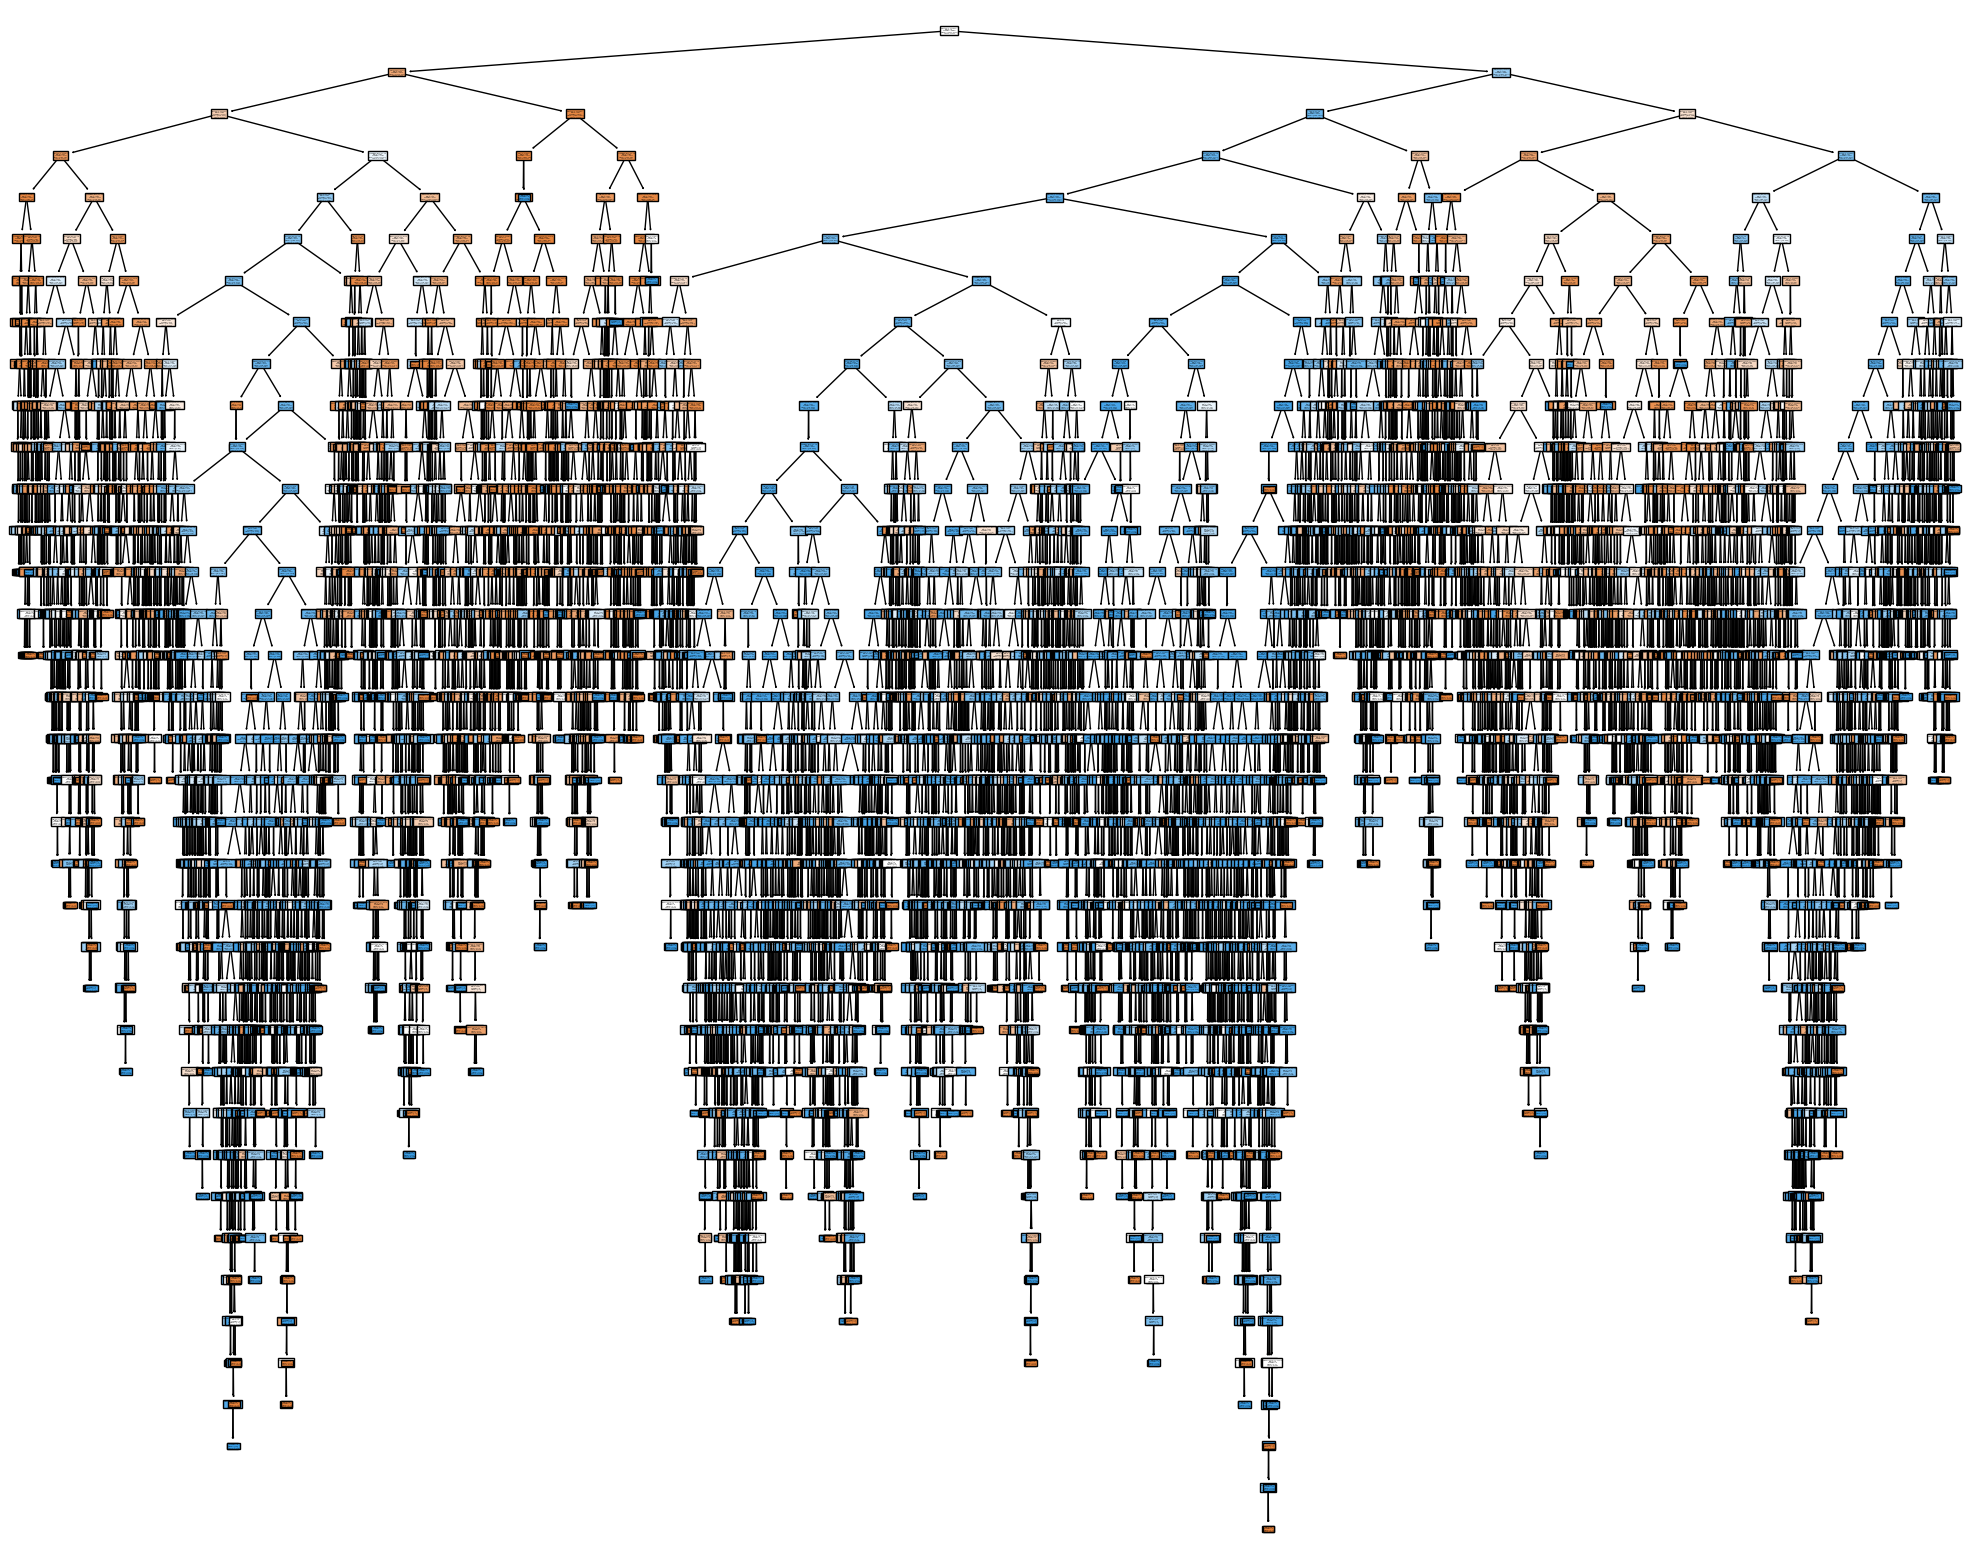

In [139]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

#Hiển thị cây quyết định
tree.plot_tree(Tree_person, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

In [140]:
from sklearn.tree import export_text

# Danh sách tên thuộc tính
feature_names = ['age (T)',
                 'job (CV)',
                 'marital (HN)',
                 'education (HV)',
                 'default (NX)',
                 'balance (SDTK)',
                 'housing (NC)',
                 'loan (V)',
                 'contact (PTLL)',
                 'duration (s)',
                 'campaign (SLLL)']

# Xuất biểu diễn cây dưới dạng văn bản
tree_rules = export_text(Tree_person, feature_names=feature_names)

# In ra biểu diễn cây
print(tree_rules)

|--- duration (s) <= 204.50
|   |--- housing (NC) <= 1.50
|   |   |--- duration (s) <= 114.50
|   |   |   |--- duration (s) <= 80.50
|   |   |   |   |--- duration (s) <= 64.50
|   |   |   |   |   |--- campaign (SLLL) <= 1.50
|   |   |   |   |   |   |--- contact (PTLL) <= 1.50
|   |   |   |   |   |   |   |--- balance (SDTK) <= 374.00
|   |   |   |   |   |   |   |   |--- balance (SDTK) <= 298.50
|   |   |   |   |   |   |   |   |   |--- age (T) <= 46.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age (T) >  46.50
|   |   |   |   |   |   |   |   |   |   |--- marital (HN) <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- marital (HN) >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- balance (SDTK) >  298.50
|   |   |   |   |   |   |   |   |   |--- education (HV) <= 2.50
|   |   |   |   |   |   |   |   |   |   

['age (T)', 'job (CV)', 'marital (HN)', 'education (HV)', 'default (NX)', 'balance (SDTK)', 'housing (NC)', 'loan (V)', 'contact (PTLL)', 'duration (s)', 'campaign (SLLL)']
[0.08346371 0.0480555  0.01825881 0.04076743 0.00060339 0.15453638
 0.12216678 0.03078671 0.02772011 0.41903896 0.05460222]


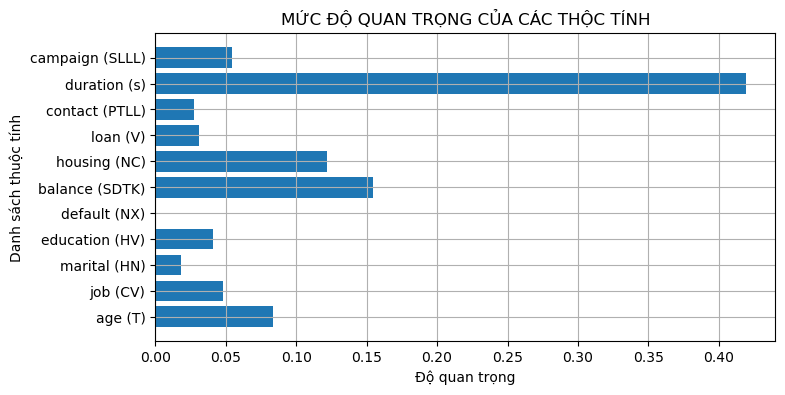

In [141]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(Tree_person.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,Tree_person.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [142]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      Tree_person.get_depth())

#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      Tree_person.get_n_leaves())

Độ sâu của cây quyết định: 36
Số nút lá của cây quyết định: 6369


## Đánh giá model trên tập kiểm thử:
---
Sử dụng model dự đoán trên tập Test và đánh giá độ chính xác

In [120]:
#Tập test gồm 45 mẫu:
X1_test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign
39074,30,9,1,2,1,163,2,1,2,149,1
898,49,0,1,3,1,326,2,1,1,99,2
41522,77,6,2,4,1,300,1,1,2,511,1
6435,38,3,1,3,1,-735,2,1,1,134,2
15177,29,2,1,2,1,1,2,1,2,695,1
...,...,...,...,...,...,...,...,...,...,...,...
28650,29,2,2,2,1,475,1,1,2,346,2
17010,55,5,1,4,1,2490,1,1,3,106,3
36768,39,0,2,3,1,102,2,1,2,293,2
8190,29,5,2,3,1,80,2,2,1,281,4


In [121]:
#Phân loại hoa lan trên tập kiểm thử
y_pred = Tree_person.predict(X1_test)

print("Kết quả phân loại khách hàng trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y1_test.values.ravel())

Kết quả phân loại khách hàng trên tập dữ liệu TEST:
Predicted labels:  [0 0 1 ... 0 0 0]
Ground truth    :  [0 0 0 ... 0 0 0]


In [123]:
#Đánh giá độ chính xác trên tập Test:
from sklearn.metrics import accuracy_score
acc_num = accuracy_score(y1_test, y_pred, normalize=False)
acc = accuracy_score(y1_test, y_pred, normalize=True)

print("1.Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y1_test))
print("2.Độ chính xác đạt của model trên tập Test:", round(acc*100,2))

1.Tổng số mẫu dự đoán đúng: 11062.0 / 13561
2.Độ chính xác đạt của model trên tập Test: 81.57


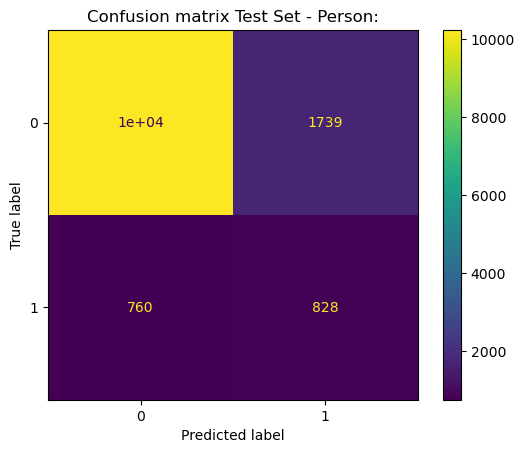

In [125]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_bank = confusion_matrix(y1_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y1_test, y_pred)
plt.title('Confusion matrix Test Set - Person:')
plt.show()

####  Độ chính xác trên tập Train là 99,9%. Độ chính xác trên tập Test là 81,51% --> Overfitting

## Thay đổi thông số + không xử lý cân bằng dữ liệu

In [129]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Khai báo mô hình - thay đổi thông số
Tree_person_2 = DecisionTreeClassifier(min_samples_split=200, min_samples_leaf=75)

#Liệt kê danh sách 
Tree_person_2

DecisionTreeClassifier(min_samples_leaf=75, min_samples_split=200)

In [131]:
# Huấn luyện mô hình với dữ liệu huấn luyện:
Tree_person_2.fit(X1_train, y1_train)

DecisionTreeClassifier(min_samples_leaf=75, min_samples_split=200)

In [132]:
#Đánh giá độ chính xác trên tập Huấn luyện:
acc_train = Tree_person_2.score(X1_train, y1_train)
print('Độ chính xác trên tập train', acc_train)

Độ chính xác trên tập train 0.8946303846275402


### Hiển thị cây quyết định:
---
Trực quan hóa cây quyết định thu được từ model đã huấn luyện trên tập Train

In [134]:
#Đặt tên cho các thuộc tính và các lớp khách hàng:
feature_names = ['age (T)',
                 'job (CV)',
                 'marital (HN)',
                 'education (HV)',
                 'default (NX)',
                 'balance (SDTK)',
                 'housing (NC)',
                 'loan (V)',
                 'contact (PTLL)',
                 'duration (s)',
                 'campaign (SLLL)']

target_names = ['1: DDM', '2: ATSM']

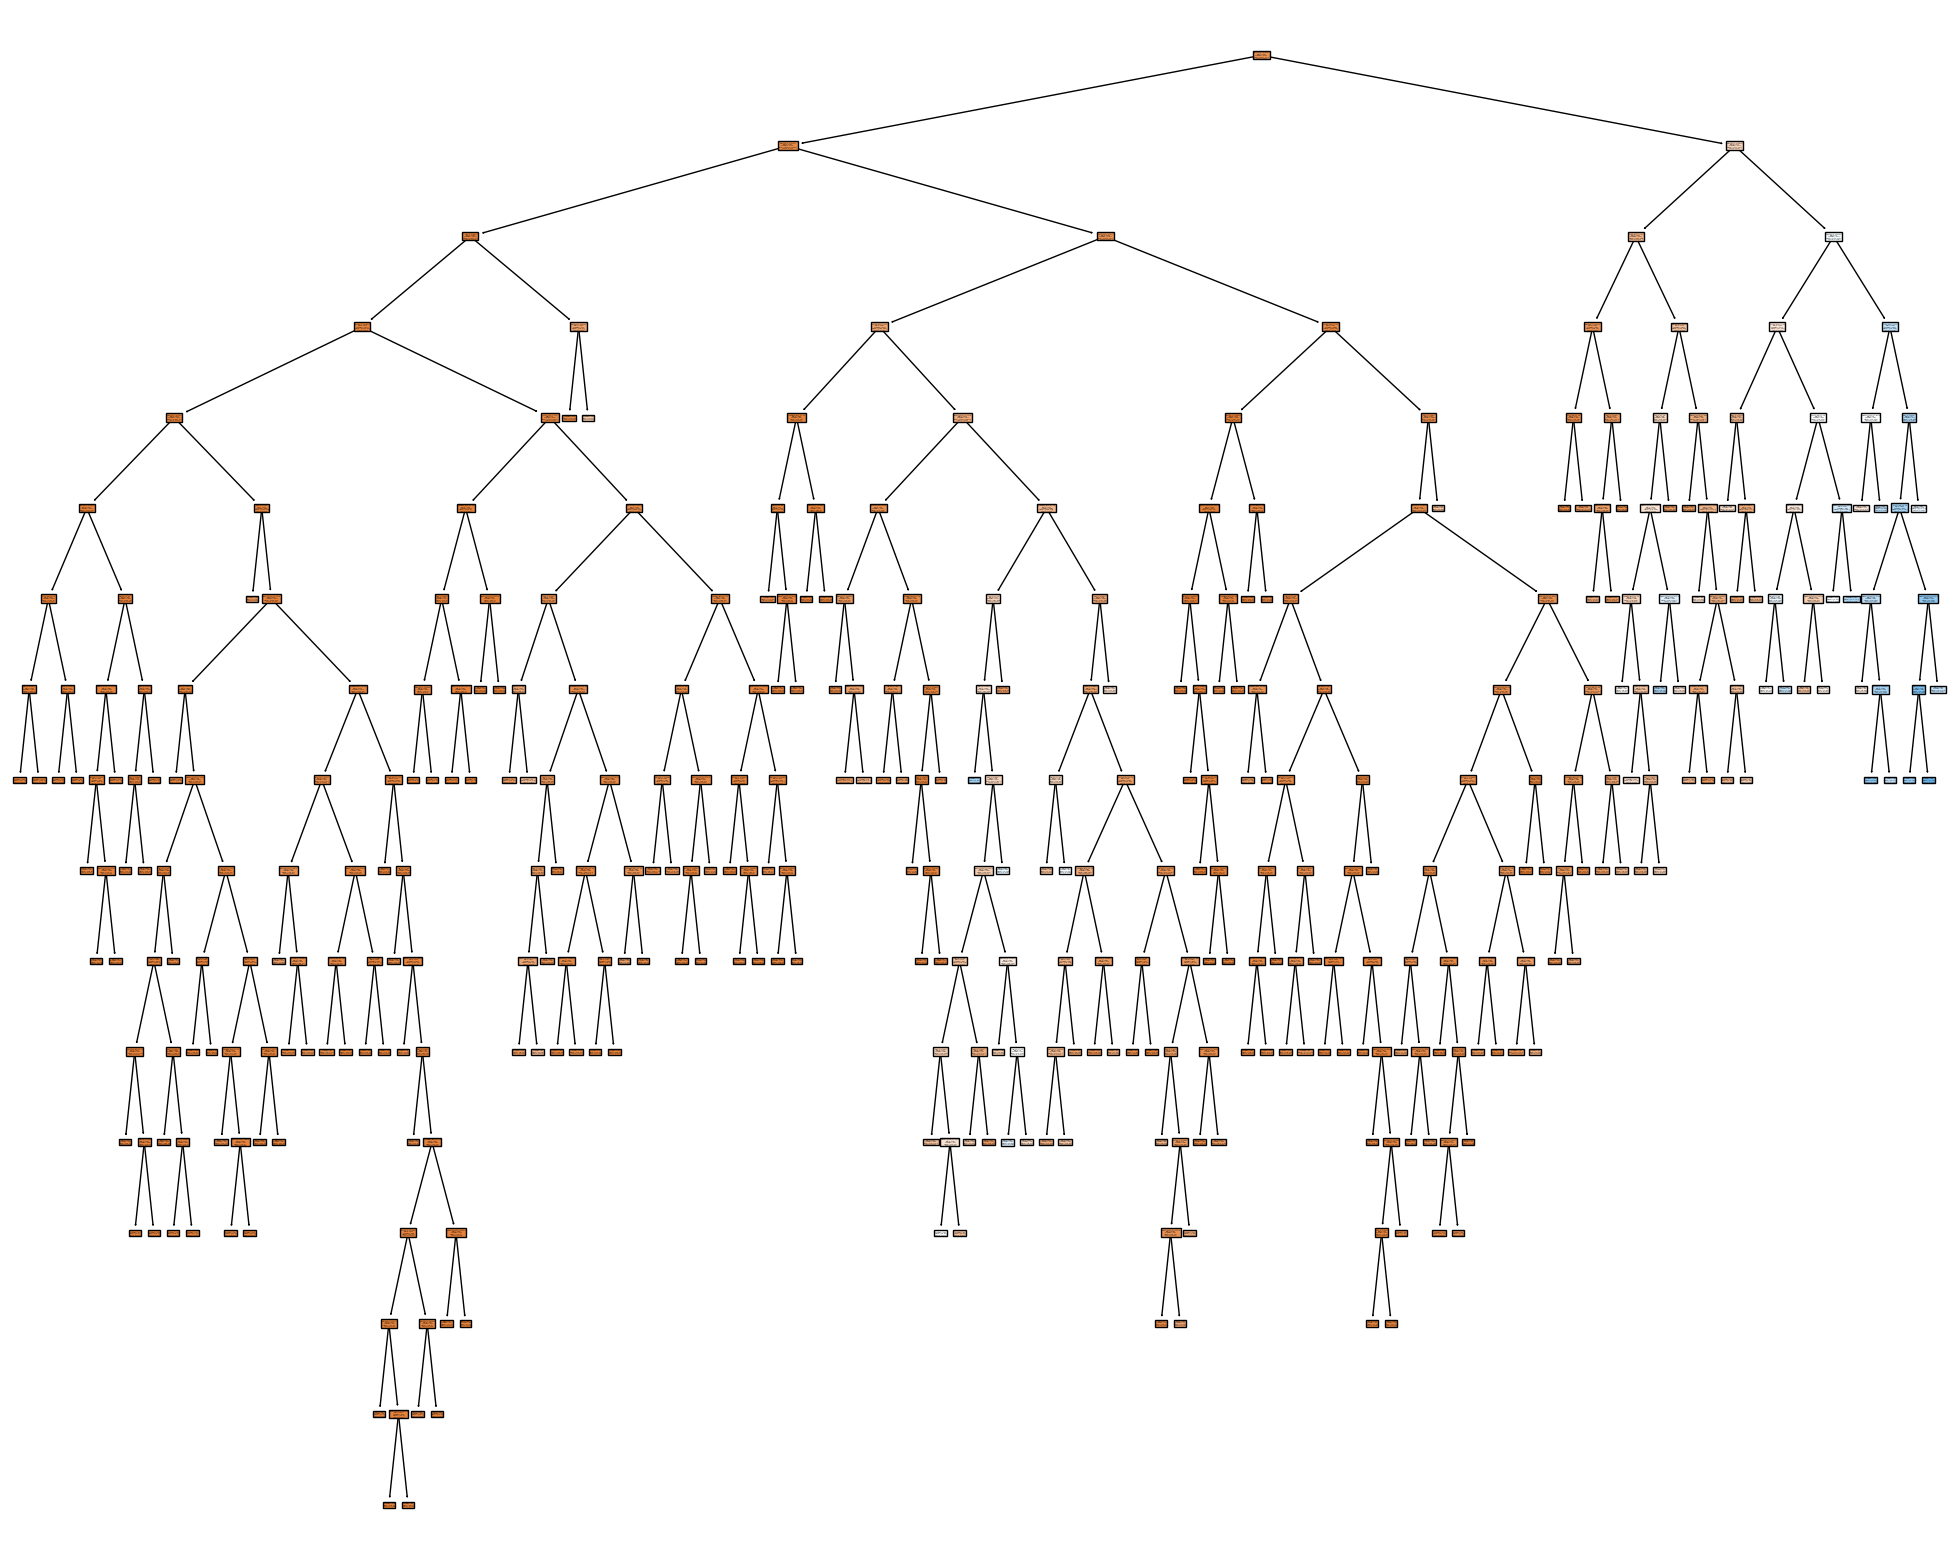

In [137]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

#Hiển thị cây quyết định
tree.plot_tree(Tree_person_2, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

In [138]:
from sklearn.tree import export_text

# Danh sách tên thuộc tính
feature_names = ['age (T)',
                 'job (CV)',
                 'marital (HN)',
                 'education (HV)',
                 'default (NX)',
                 'balance (SDTK)',
                 'housing (NC)',
                 'loan (V)',
                 'contact (PTLL)',
                 'duration (s)',
                 'campaign (SLLL)']

# Xuất biểu diễn cây dưới dạng văn bản
tree_rules_1 = export_text(Tree_person_2, feature_names=feature_names)

# In ra biểu diễn cây
print(tree_rules_1)


|--- duration (s) <= 451.50
|   |--- duration (s) <= 174.50
|   |   |--- age (T) <= 60.50
|   |   |   |--- duration (s) <= 129.50
|   |   |   |   |--- duration (s) <= 79.50
|   |   |   |   |   |--- duration (s) <= 60.50
|   |   |   |   |   |   |--- marital (HN) <= 2.50
|   |   |   |   |   |   |   |--- age (T) <= 27.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age (T) >  27.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- marital (HN) >  2.50
|   |   |   |   |   |   |   |--- age (T) <= 52.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age (T) >  52.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration (s) >  60.50
|   |   |   |   |   |   |--- job (CV) <= 2.50
|   |   |   |   |   |   |   |--- balance (SDTK) <= 1282.00
|   |   |   |   |   |   |   |   |--- duration (s) <= 67.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--

['age (T)', 'job (CV)', 'marital (HN)', 'education (HV)', 'default (NX)', 'balance (SDTK)', 'housing (NC)', 'loan (V)', 'contact (PTLL)', 'duration (s)', 'campaign (SLLL)']
[0.06620567 0.01323861 0.00778054 0.00855356 0.         0.06660307
 0.09096572 0.01691107 0.08608327 0.60350048 0.04015801]


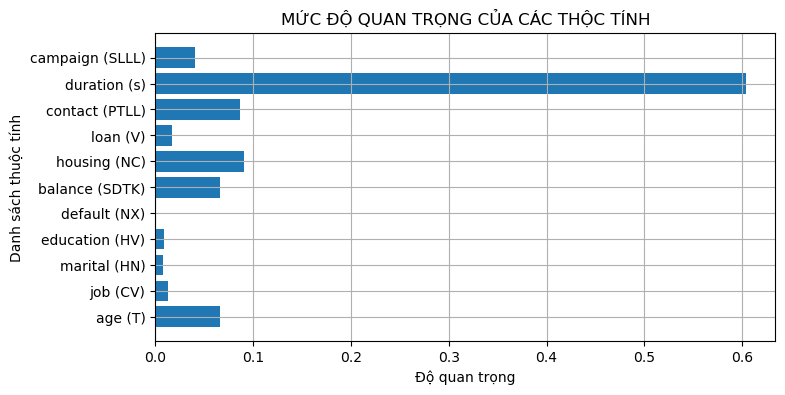

In [139]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(Tree_person_2.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,Tree_person_2.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [140]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      Tree_person_2.get_depth())

#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      Tree_person_2.get_n_leaves())

Độ sâu của cây quyết định: 16
Số nút lá của cây quyết định: 197


## Đánh giá model trên tập kiểm thử:
---
Sử dụng model dự đoán trên tập Test và đánh giá độ chính xác

In [144]:
#Tập test gồm 45 mẫu:
X1_test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign
39074,30,9,1,2,1,163,2,1,2,149,1
898,49,0,1,3,1,326,2,1,1,99,2
41522,77,6,2,4,1,300,1,1,2,511,1
6435,38,3,1,3,1,-735,2,1,1,134,2
15177,29,2,1,2,1,1,2,1,2,695,1
...,...,...,...,...,...,...,...,...,...,...,...
28650,29,2,2,2,1,475,1,1,2,346,2
17010,55,5,1,4,1,2490,1,1,3,106,3
36768,39,0,2,3,1,102,2,1,2,293,2
8190,29,5,2,3,1,80,2,2,1,281,4


In [145]:
#Phân loại hoa lan trên tập kiểm thử
y_pred = Tree_person_2.predict(X1_test)

print("Kết quả phân loại khách hàng trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y1_test.values.ravel())

Kết quả phân loại khách hàng trên tập dữ liệu TEST:
Predicted labels:  [0 0 0 ... 0 0 0]
Ground truth    :  [0 0 0 ... 0 0 0]


In [146]:
#Đánh giá độ chính xác trên tập Test:
from sklearn.metrics import accuracy_score
acc_num = accuracy_score(y1_test, y_pred, normalize=False)
acc = accuracy_score(y1_test, y_pred, normalize=True)

print("1.Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y1_test))
print("2.Độ chính xác đạt của model trên tập Test:", round(acc*100,2))

1.Tổng số mẫu dự đoán đúng: 12031.0 / 13561
2.Độ chính xác đạt của model trên tập Test: 88.72


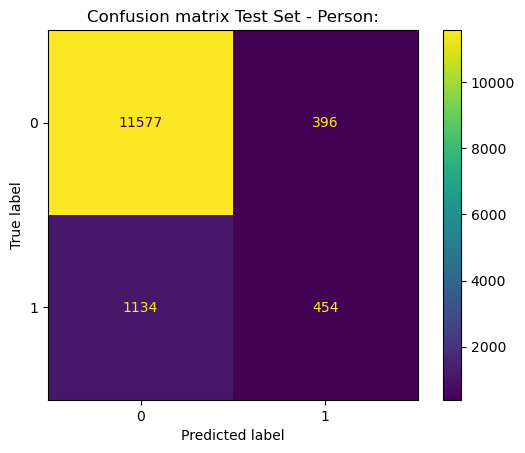

In [147]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_bank = confusion_matrix(y1_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y1_test, y_pred)
plt.title('Confusion matrix Test Set - Person:')
plt.show()

#### Độ chính xác trên tập Train là 89,4%. Độ chính xác trên tập Test là 88,72% → Thuộc mức "Best fit" (khá tốt).

## Sử dụng model được huấn luyện dự đoán cho bộ dữ liệu mới
---

## Khách hàng 1: Age: 30, job: entrepreneu, marital: single, education: secondary, default: no, balance: 700, housing: no, loan: yes, contact: telephone, duration: 158, campaign: 2

In [152]:
#Khai báo thông số khách hàng mới:
X1_new = np.array([[30, 4, 2, 3, 1, 700, 1, 2, 3, 158, 2]])

print('Thông số khách hàng mới:', X1_new)

Thông số khách hàng mới: [[ 30   4   2   3   1 700   1   2   3 158   2]]


In [153]:
#Xác định lớp của bệnh qua các thông số này trên model đã huấn luyện
y1_new = Tree_person_2.predict(X1_new)
print(y1_new)
if (y1_new == 0):
    print('Khách hàng không đăng ký mở thẻ tín dụng')
else:
    print('Khách hàng đăng ký mở thẻ tín dụng')

[0]
Khách hàng không đăng ký mở thẻ tín dụng


---
## khách hàng 2: Age: 45, job: technician, marital: married, education: tertiary, default: no, balance: 2500, housing: yes, loan: no, contact: cellular, duration: 312, campaign: 1

In [157]:
#Khai báo thông số khách hàng mới:
X2_new = np.array([[45, 3, 1, 2, 1, 2500, 2, 1, 2, 312, 1]])

print('Thông số khách hàng mới:', X2_new)

Thông số khách hàng mới: [[  45    3    1    2    1 2500    2    1    2  312    1]]


In [158]:
#Xác định lớp của bệnh qua các thông số này trên model đã huấn luyện
y2_new = Tree_person_2.predict(X2_new)
print(y2_new)
if (y2_new == 0):
    print('Khách hàng không đăng ký mở thẻ tín dụng')
else:
    print('Khách hàng đăng ký mở thẻ tín dụng')

[0]
Khách hàng không đăng ký mở thẻ tín dụng


---
## Khách hàng 3: age: 51, job: management, marital: divorced, education: primary, default: yes, balance: 1150, housing: no, loan: yes, contact: cellular, duration: 3330, campaign: 3

In [161]:
#Khai báo thông số khách hàng mới:
X3_new = np.array([[51, 2, 3, 4, 2, 1150, 1, 2, 2, 3330, 3]])

print('Thông số khách hàng mới:', X3_new)

Thông số khách hàng mới: [[  51    2    3    4    2 1150    1    2    2 3330    3]]


In [163]:
#Xác định lớp của bệnh qua các thông số này trên model đã huấn luyện
y3_new = Tree_person_2.predict(X3_new)
print(y3_new)
if (y3_new == 0):
    print('Khách hàng không đăng ký mở thẻ tín dụng')
else:
    print('Khách hàng đăng ký mở thẻ tín dụng')

[1]
Khách hàng đăng ký mở thẻ tín dụng
